The Objective of this CNN is to classify whether the object is a hotdog or not. This is in reference to Silicon Valley Show.


In [ ]:
#importing all the necessary modules

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import urllib
import requests
from PIL import Image 

In [ ]:
#Since the file saved is in google drive, we need to access it using this code. 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Javascript code to download images: 

urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')))
;



In [ ]:
#We used the JS code to download images URL in a csv file and now we will download the images using urllib
#We will run this code only ONCE.


def download_images():
  j = 0
  pf_1 = open("/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Pizzeria/pizza.csv","r")
  pf_2 = open("/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Pizzeria/pizza2.csv", "r")
  data1 = pf_1.read()
  data2 = pf_2.read()
  data = []
  data.extend(data1.split('\n'))
  data.extend(data2.split('\n'))
  # print(data)
  for i in data:
    if i!='':
      urllib.request.urlretrieve(i,"/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Pizzeria/p%d.jpg"%j)
      j+=1


download_images()



In [ ]:
#Now we have downloaded the images and we will load them into numpy arrays

image_path_hotdog = "/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Hot_Dog/"
image_path_pizza = "/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Pizzeria/"

def get_image(path):
  image_files = ([os.path.join(path, file)
         for file in os.listdir(path) if file.endswith('.jpg')])
 
  return image_files

hotdogs = get_image(image_path_hotdog)
pizza = get_image(image_path_pizza)
print(len(hotdogs), len(pizza))

264 242


In [ ]:
# hotdogs

In [ ]:
#Since we have loaded the images, we will preprocess them i.e. 
#1. Resizing
#2. Blurring
#3. To be added...

x = [] #This is the array to used to store the numpy arrays with their labels
x1 = []

def preprocess(image_array):
  WIDTH = 220
  HEIGHT = 220
  for i in image_array:
    full_size_image = cv2.imread(i)
    img_resize = cv2.resize(full_size_image, (WIDTH, HEIGHT), interpolation = cv2.INTER_CUBIC) / 255.0
    blur_img = np.array(cv2.GaussianBlur(img_resize, (5, 5), 0))
    final_img = np.rollaxis(blur_img,2,0)
    x1.append(blur_img)

    if("hd" in i):
      label = 0
    elif("p" in i):
      label = 1

    x.append((final_img,label))


preprocess(hotdogs)
preprocess(pizza)


print(x)

[(array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]]), 0), (array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]

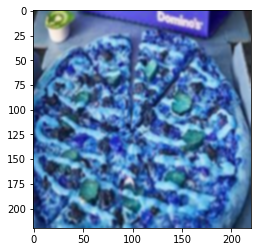

In [ ]:
x1 = np.array(x1)
plt.imshow(x1[350])

In [ ]:
#Creating Datasets for training

batch_size = 10
validation_split = 0.2
random_seed = 42

dataset_length = len(x)
indices = list(range(dataset_length))
split = int(np.floor(validation_split*dataset_length))
shuffle_dataset = True
if shuffle_dataset:
  np.random.seed(random_seed)
  np.random.shuffle(indices)

train_indices, test_indices = indices[split:],indices[:split]
print(len(train_indices),len(test_indices))

train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)

train_loader = torch.utils.data.DataLoader(x, batch_size = batch_size, sampler = test_sampler)
test_loader = torch.utils.data.DataLoader(x, batch_size = batch_size, sampler = test_sampler)


405 101


In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.size(), labels.size()

(torch.Size([10, 3, 220, 220]), torch.Size([10]))

Now we Create our own CNN


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class model(nn.Module):
  def __init__(self):
    super(model, self).__init__()
    self.conv1 = nn.Conv2d(3,16,11,stride = 1, padding = 1)
    torch.nn.init.kaiming_normal_(self.conv1.weight)
    self.pool1 = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(16,64,5,stride = 1,padding = 1)
    torch.nn.init.kaiming_normal_(self.conv2.weight)
    # self.pool2 = nn.MaxPool2d(2,2)
    self.relu = nn.LeakyReLU(0.3)
    # self.conv3 = nn.Conv2d(64,128,5,stride = 1, padding = 2)
    # self.fc1 = nn.Linear(128*26*26,120)
    self.fc2 = nn.Linear(64*52*52,84)
    torch.nn.init.kaiming_normal_(self.fc2.weight)
    self.fc3 = nn.Linear(84,2)
    torch.nn.init.kaiming_normal_(self.fc3.weight)

  def forward(self,x):
    x = self.pool1(self.relu(self.conv1(x)))
    x = self.pool1(self.relu(self.conv2(x)))
    # x = self.pool1(self.relu(self.conv3(x)))
    x = x.view(-1,64*52*52)
    # x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = F.softmax(self.fc3(x))

    return x

Model = model()
print(Model)


model(
  (conv1): Conv2d(3, 16, kernel_size=(11, 11), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (relu): LeakyReLU(negative_slope=0.3)
  (fc2): Linear(in_features=173056, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
model = torchvision.models.resnet34(pretrained = True)
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

num = model.fc.in_features
set_parameter_requires_grad(model,True)
num_classes = 2
model.fc = torch.nn.Linear(num,num_classes)


params_to_update = model.parameters()
print(params_to_update)
params_to_update = []
for name,param in model.named_parameters():
  if param.requires_grad == True:
    params_to_update.append(param)
    print("\t",name)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth



<generator object Module.parameters at 0x7fe443486a40>
	 fc.weight
	 fc.bias


In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
criterion = torch.nn.CrossEntropyLoss()

It's Time for Trainig the data


In [ ]:
print("Training....\n")
num_of_epochs = 30
running_loss = []
for epoch in range(num_of_epochs):
  run_loss = 0.0
  for i, data in enumerate(train_loader,0):
    inputs, labels = data

    optimizer.zero_grad()
    outputs = model(inputs.float())
    _, predicted = torch.max(outputs.data, 1)
    loss = criterion(outputs, labels)
    print(labels, predicted)
    loss.backward()
    optimizer.step()

    run_loss+=loss.item()
    print('[%d, %d] loss: %.3f' %(epoch + 1, i + 1, run_loss))
    running_loss.append(run_loss)
    run_loss = 0.0



Training....

tensor([0, 1, 1, 1, 1, 0, 1, 0, 0, 0]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
[1, 1] loss: 0.915
tensor([0, 1, 0, 0, 0, 0, 0, 1, 1, 1]) tensor([1, 0, 0, 0, 1, 0, 0, 1, 0, 0])
[1, 2] loss: 0.722
tensor([0, 0, 0, 0, 0, 1, 1, 1, 0, 0]) tensor([1, 1, 1, 1, 0, 0, 1, 1, 0, 1])
[1, 3] loss: 0.710
tensor([0, 1, 0, 1, 0, 0, 1, 0, 1, 1]) tensor([0, 1, 1, 1, 1, 1, 0, 0, 0, 0])
[1, 4] loss: 0.809
tensor([1, 1, 1, 0, 1, 0, 0, 1, 1, 0]) tensor([1, 0, 1, 0, 0, 0, 0, 0, 1, 0])
[1, 5] loss: 0.636
tensor([1, 1, 0, 1, 1, 0, 1, 1, 1, 0]) tensor([1, 1, 0, 1, 0, 1, 1, 0, 1, 0])
[1, 6] loss: 0.568
tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 0]) tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 0])
[1, 7] loss: 0.570
tensor([1, 0, 1, 1, 0, 1, 0, 1, 1, 0]) tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])
[1, 8] loss: 0.548
tensor([1, 0, 1, 1, 1, 1, 1, 0, 0, 1]) tensor([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])
[1, 9] loss: 0.375
tensor([1, 0, 1, 0, 0, 1, 0, 1, 1, 0]) tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 0])
[1, 10] loss: 0.599
tensor([0]) ten

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        print("Labels:",labels)
        outputs = model(images.float())
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on train images: ', correct/total)

Labels: tensor([1, 1, 0, 0, 1, 1, 1, 0, 0, 0])
tensor([1, 1, 0, 0, 1, 1, 1, 0, 0, 0])
Labels: tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 0])
tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 0])
Labels: tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 0])
tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 0])
Labels: tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
tensor([0, 1, 0, 0, 1, 1, 1, 1, 1, 0])
Labels: tensor([1, 0, 0, 0, 0, 1, 0, 0, 0, 1])
tensor([1, 1, 1, 1, 0, 1, 0, 1, 0, 1])
Labels: tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 1])
tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 1])
Labels: tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])
tensor([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])
Labels: tensor([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])
tensor([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])
Labels: tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
Labels: tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 1])
tensor([1, 1, 1, 0, 1, 1, 1, 0, 0, 1])
Labels: tensor([1])
tensor([1])
Accuracy of the network on train images:  0.9405940594059405


In [ ]:
#save the model

# import pickle
# pickle.dump(Model,open("/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/hotdog-pizza.pkl","wb"))

# first we will save the parameters only

torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/resnetweights.pth")
torch.save(model,"/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/ResnetModel.pth")

In [ ]:
# new_model = model()
# new_model.load_state_dict(torch.load("/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/weights.pth"))

new_model1 = torch.load("/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/ResnetModel.pth")

['/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Test/pizza_test.jpg', '/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Test/hotdog1.jpg']
1


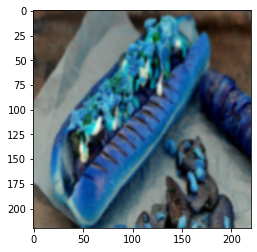

In [ ]:
#test the model

image_path = "/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/Test"
# model = pickle.load(open("/content/drive/My Drive/Colab Notebooks/HotDog-Pizza/hotdog-pizza.pkl", "rb"))
test_pizza = get_image(image_path)
print(test_pizza)

#preprocessing

y = []
full_size_image = cv2.imread(test_pizza[1])
img_resize = cv2.resize(full_size_image, (220, 220), interpolation = cv2.INTER_CUBIC)
blur_img = np.array(cv2.GaussianBlur(img_resize, (5, 5), 0))
final_img = np.rollaxis(blur_img,2,0)
plt.imshow(blur_img)
y.append((final_img))
y_test = torch.FloatTensor(y)


test_output = new_model1(y_test)
_, predicted = torch.max(test_output.data, 1)
prediction = int(torch.max(test_output.data, 1)[1].numpy())
print(prediction)

